#                                          TTS DEMO NOTEBOOK
                                      

In [1]:
## IMPORT LIBRARY
import matplotlib
%matplotlib inline
import matplotlib.pylab as plt
import IPython.display as ipd
import librosa.display
import time
from tts_infer import prepare_models_and_dicts, text2speech, save_audio, text2mel
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

/home/lampv/anaconda3/lib/python3.7/site-packages/ZaG2P/constant.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  parser = yaml.load(f)


In [11]:
# prepare models
tacotron_model, waveglow_model, denoiser_model, g2p_model, g2p_dict, word2phone_dict, symbol2numeric_dict, p_phone_mix, punctuations, eos, sigma, denoiser_strength, sampling_rate = prepare_models_and_dicts(voice='doanngocle')

Preparing models ...
Tacotron ...
Waveglow ...


/home/lampv/anaconda3/lib/python3.7/site-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'glow.WaveGlow' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/lampv/anaconda3/lib/python3.7/site-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'torch.nn.modules.conv.ConvTranspose1d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/lampv/anaconda3/lib/python3.7/site-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleList' has changed. you can retrieve the original source code by accessing the object's s

Denoiser ...
G2P ...
Preparing dictionaries...
TTS is ready ...


In [12]:
## run tts demo here
s = time.time()
text = "tối rất thích đi hát ở quán man-chét-tơ iu ni tựt"
audio = text2speech(text, tacotron_model, waveglow_model, denoiser_model, g2p_model, g2p_dict, word2phone_dict, symbol2numeric_dict, p_phone_mix, punctuations, eos, sigma=0.9, denoiser_strength=0.005)
print(time.time()-s)
ipd.Audio(audio, rate=16000) 

/home/lampv/anaconda3/lib/python3.7/site-packages/ZaG2P/models.py:75: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  attn = F.softmax(context.bmm(x.unsqueeze(2)).squeeze(2))
/home/lampv/anaconda3/lib/python3.7/site-packages/ZaG2P/models.py:99: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(o).view(x_seq.size(0), -1, o.size(1)), h, c


man<unk>ch<unk>t<unk>t<unk> man tran tựt
tối rất thích đi hát ở quán man tran tựt iu ni tựt .
0.31188416481018066


In [13]:
## save audio
audio_path = 'test.wav'
save_audio(audio, audio_path=audio_path)

test.wav


In [14]:
# plot mel-spec predicted
mel_spec_postnet, alignments = text2mel(text, tacotron_model, g2p_model, g2p_dict,  word2phone_dict, symbol2numeric_dict, p_phone_mix, punctuations, eos, use_g2p)
data = (mel_spec_postnet.float().data.cpu().numpy()[0], alignments.float().data.cpu().numpy()[0].T)
fig, axes = plt.subplots(1, len(data), figsize=(20, 4.5))
for i in range(len(data)):
    axes[i].imshow(data[i], aspect='auto', origin='bottom', interpolation='none')

NameError: name 'use_g2p' is not defined

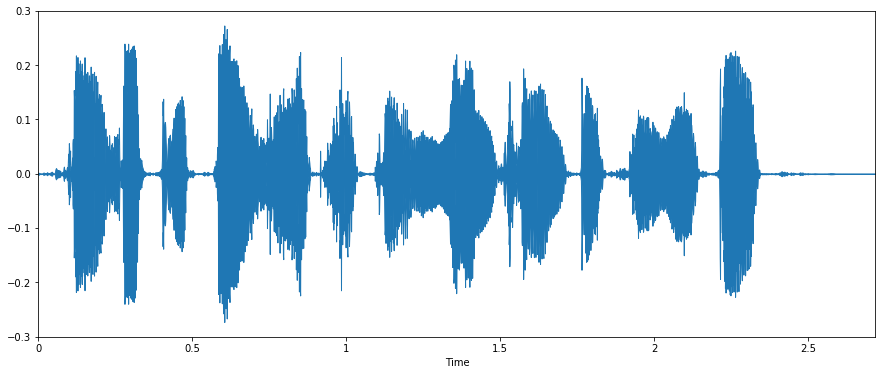

In [7]:
y, sr = librosa.load(audio_path)
plt.figure(figsize=(15,6))
librosa.display.waveplot(y, sr=sr)